In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd

Matplotlib created a temporary config/cache directory at /var/folders/zf/49prmn_s7s5861rytkmr3_080000gn/T/matplotlib-f4t67xcc because the default path (/Users/ribells/.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [78]:
#115 years of monthly, seasonal and annual rainfall data of India
poll = pd.read_csv('Pollution.csv', sep=",")
poll.head()

,City,Latitude,Longitude,Region,Country,AirQuality,WaterPollution
0,Invercargill,-46.417871,168.361466,Southland Region,New Zealand,72.222222,30.000000
1,Coyhaique,-45.571225,-72.068265,Aysen Region,Chile,0.000000,25.000000
2,Hobart,-42.882605,147.325720,Tasmania,Australia,92.857143,21.052632
3,Puerto Montt,-41.468917,-72.941136,Los Lagos Region,Chile,25.000000,50.000000
4,Wellington,-41.292381,174.778746,Wellington Region,New Zealand,95.689655,27.403846


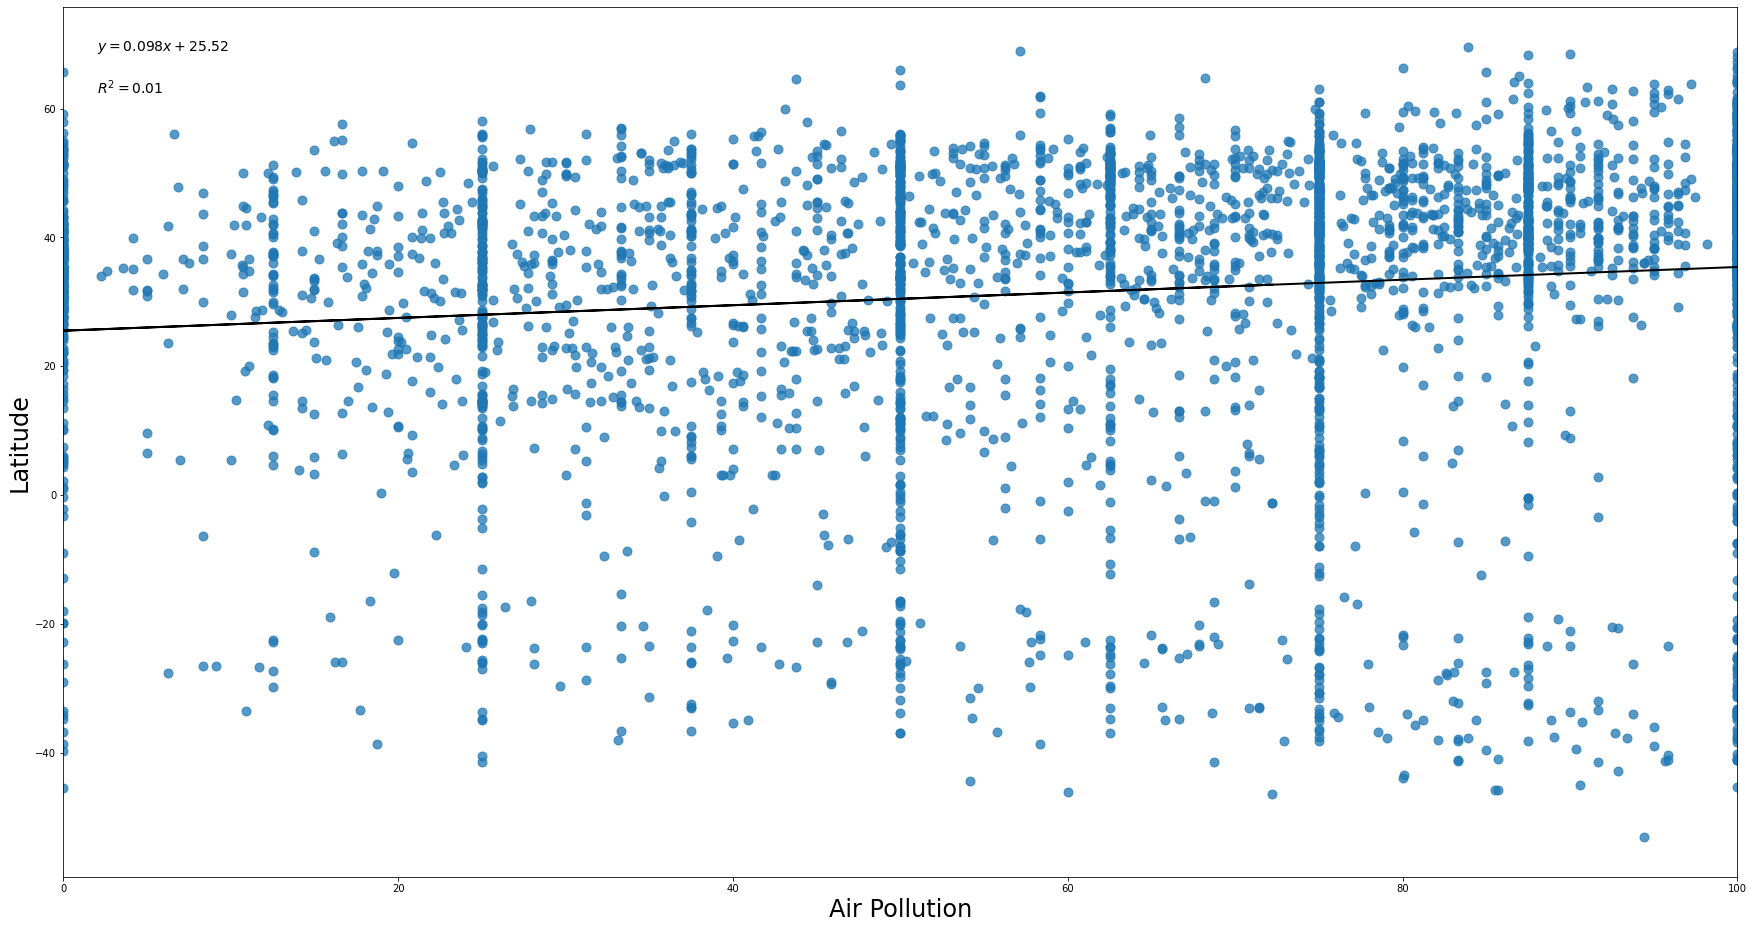

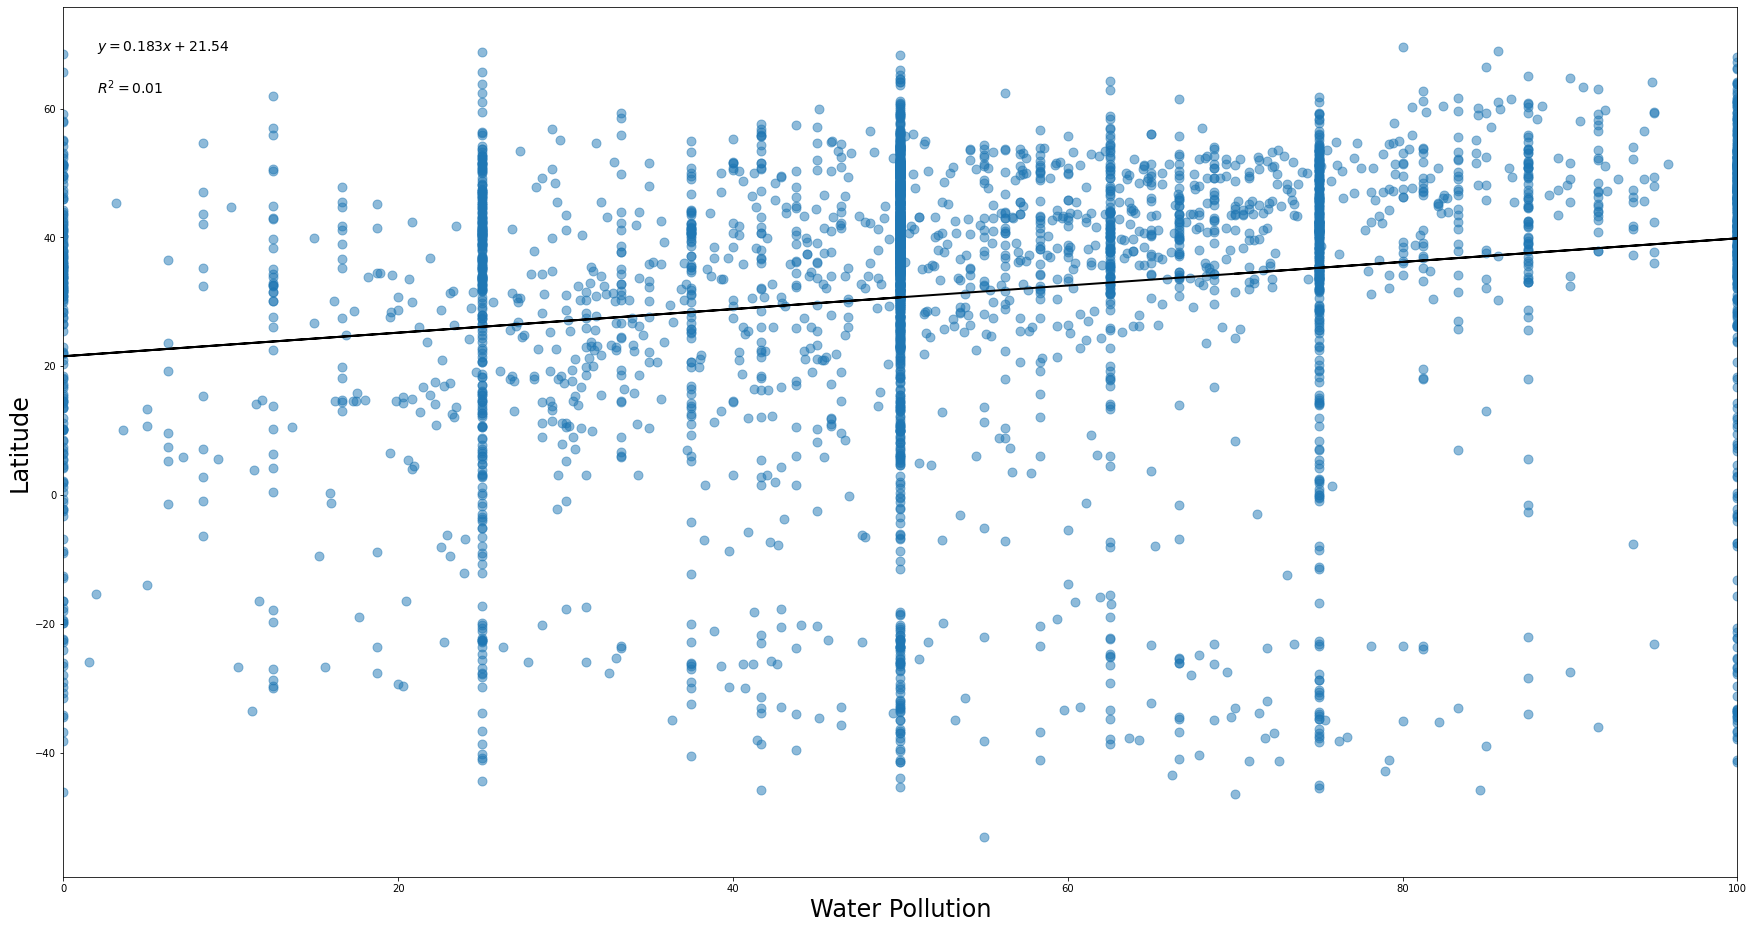

In [79]:
airquality = poll["AirQuality"]
latitude = poll["Latitude"]
longitude = poll["Longitude"]
waterquality = poll["WaterPollution"]

#create a first plot with air quality
plt.figure(figsize=(30,16))

#plt.plot(latitude, airquality)
plt.scatter(airquality, latitude, s=80, alpha=0.75)

plt.xlim([0, 100])

plt.xlabel("Air Pollution", fontsize=24)
plt.ylabel("Latitude", fontsize=24)

# Use numpy to do a simple linear fit to time series data 
model = np.polyfit(airquality, latitude, 1)
predicted = np.polyval(model, airquality)

plt.plot(airquality, predicted, linewidth=2, color='black')

slope = model[0]
intercept = model[1]
plt.annotate('$y=%3.5sx+%3.5s$'%(slope, intercept), xy=(0.02, 0.95), xycoords='axes fraction', fontsize=14)

r2 = np.corrcoef(airquality, latitude)[0, 1]**2
plt.annotate('$R^2=%3.4s$'%(r2), xy=(0.02, 0.9), xycoords='axes fraction', fontsize=14)

plt.show()

#create a second plot with water quality
plt.figure(figsize=(30,16))

plt.scatter(100-waterquality, latitude, s=80, alpha=0.50)

plt.xlim([0, 100])

plt.xlabel("Water Pollution", fontsize=24)
plt.ylabel("Latitude", fontsize=24)

# Use numpy to do a simple linear fit to time series data 
model = np.polyfit(100-waterquality, latitude, 1)
predicted = np.polyval(model, 100-waterquality)

plt.plot(100-waterquality, predicted, linewidth=2, color='black')

slope = model[0]
intercept = model[1]
plt.annotate('$y=%3.5sx+%3.5s$'%(slope, intercept), xy=(0.02, 0.95), xycoords='axes fraction', fontsize=14)

r2 = np.corrcoef(airquality, latitude)[0, 1]**2
plt.annotate('$R^2=%3.4s$'%(r2), xy=(0.02, 0.9), xycoords='axes fraction', fontsize=14)

plt.show()

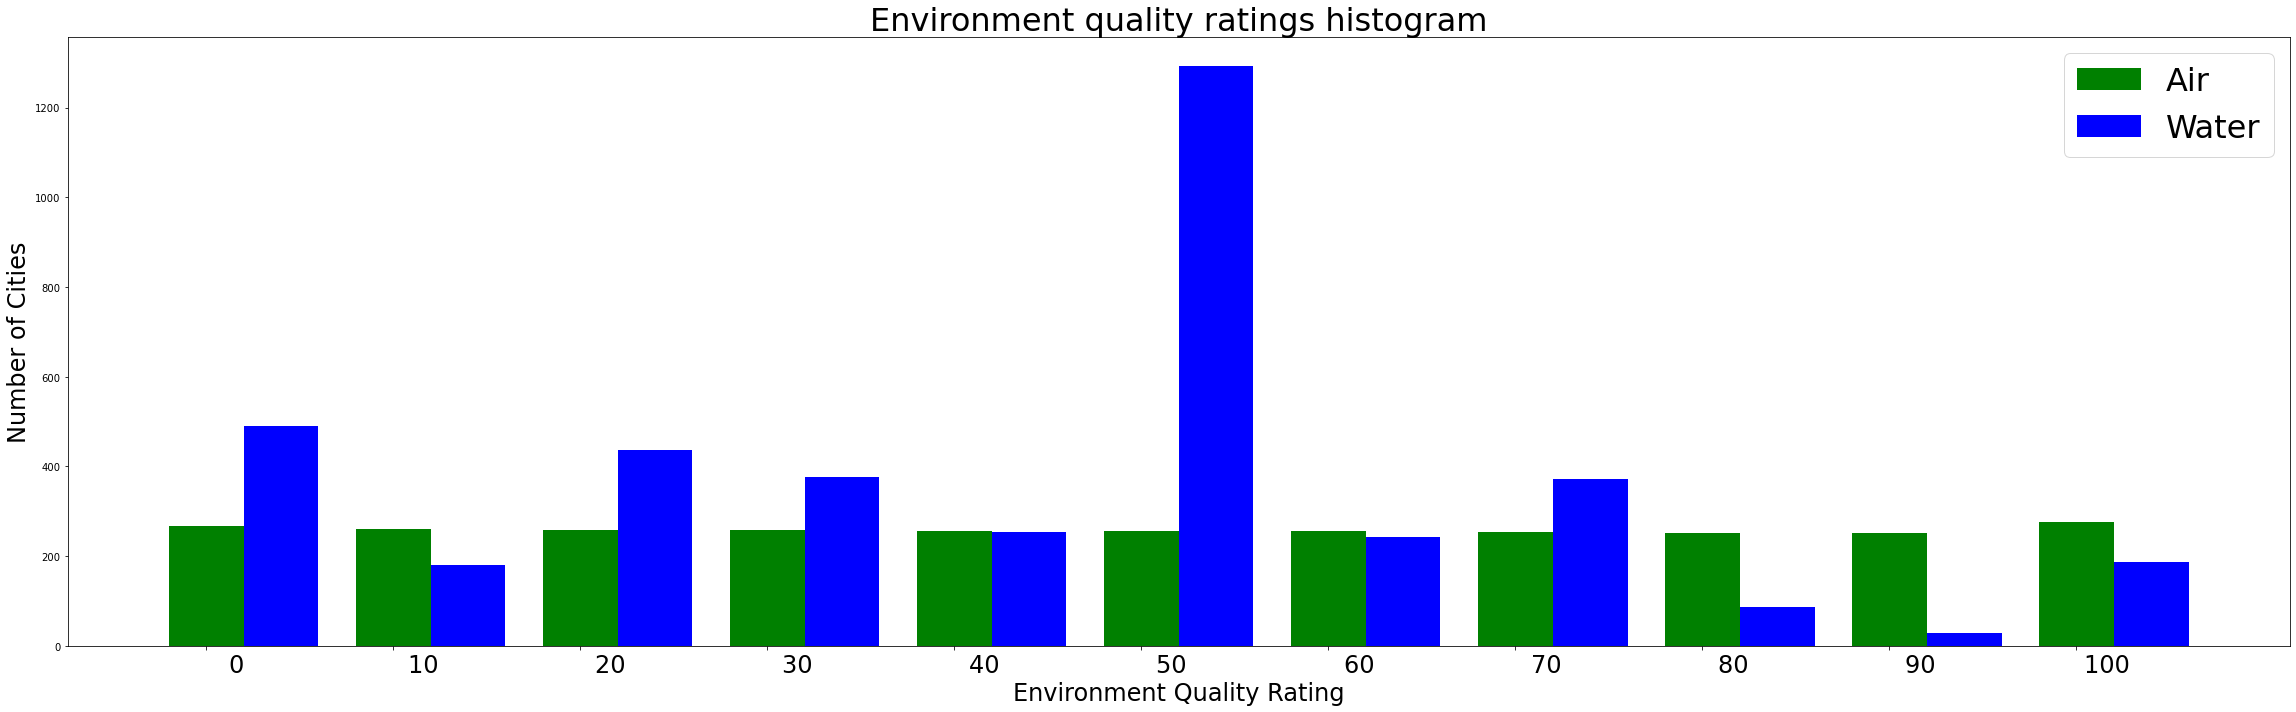

In [60]:
import matplotlib.pyplot as plt
import csv

a = [0,10,20,30,40,50,60,70,80,90,100]
b = [4,14,24,34,44,54,64,74,84,94,104]
air_histogram = [0,0,0,0,0,0,0,0,0,0,0]
water_histogram = [0,0,0,0,0,0,0,0,0,0,0]
count = 0

fig, ax = plt.subplots(1, figsize=(32, 10))

with open('Pollution.csv', 'r' , encoding="utf8") as csvfile:
    plots = csv.reader(csvfile, delimiter = ',')
      
    for row in plots:
        if count > 0:
            air_histogram[(math.floor(10-float(row[5])/10))] = air_histogram[(10-math.floor(float(row[5])/10))]+1
            water_histogram[math.floor(float(row[6])/10)] = water_histogram[math.floor(float(row[6])/10)]+1
        count = count + 1

ax.bar(a, air_histogram, width=4, color='g', align='center')
ax.bar(b, water_histogram, width=4, color='b', align='center')
ax.set_xticks(a)
ax.set_xticklabels(["        0","        10","        20","        30","        40","        50","        60","        70","        80","        90","        100"], fontsize=24)

plt.xlabel('Environment Quality Rating', fontsize=24)
plt.ylabel('Number of Cities', fontsize=24)
plt.title('Environment quality ratings histogram', fontsize=32)
plt.legend(['Air', 'Water'],loc=1, fontsize=32)

plt.show()

In [8]:
import geopandas as gpd

map_data = gpd.read_file('world_borders/WORLD_BORDERS.shp')
map_data.rename(columns = {'New_name':'UN'}, inplace = True)
map_data.shape

(246, 12)

In [9]:
map_data.head()

,FIPS,ISO2,ISO3,UN,NAME,AREA,POP2005,REGION,SUBREGION,LON,LAT,geometry
0,AC,AG,ATG,28,Antigua and Barbuda,44,83039,19,29,-61.783,17.078,"MULTIPOLYGON (((-61.68667 17.02444, -61.88722 ..."
1,AG,DZ,DZA,12,Algeria,238174,32854159,2,15,2.632,28.163,"POLYGON ((2.96361 36.80222, 4.78583 36.89472, ..."
2,AJ,AZ,AZE,31,Azerbaijan,8260,8352021,142,145,47.395,40.430,"MULTIPOLYGON (((45.08332 39.76805, 45.81999 39..."
3,AL,AL,ALB,8,Albania,2740,3153731,150,39,20.068,41.143,"POLYGON ((19.43621 41.02107, 19.60056 41.79666..."
4,AM,AM,ARM,51,Armenia,2820,3017661,142,145,44.563,40.534,"POLYGON ((45.15387 41.19860, 46.00194 40.22555..."


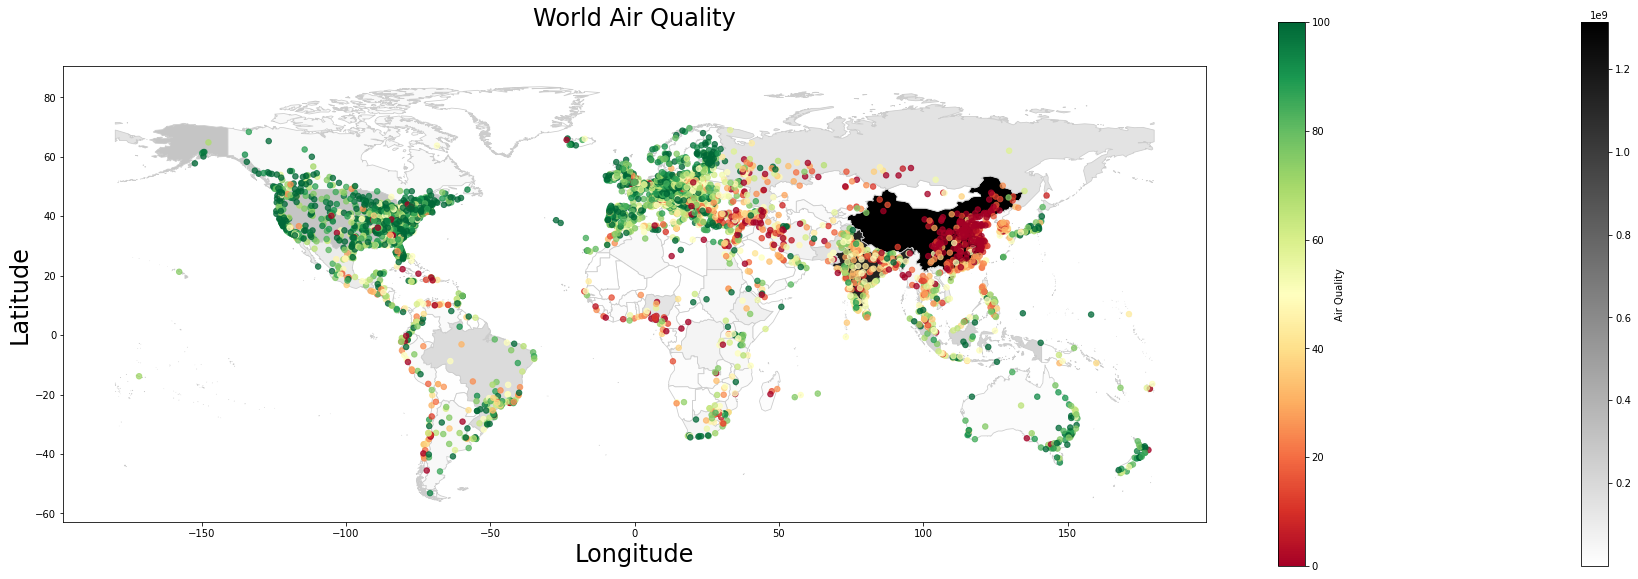

In [10]:
import matplotlib
from matplotlib import cm

fig, ax = plt.subplots(1, figsize=(32, 10))

population = map_data[map_data["POP2005"]>0]
# Visualization layer that creates a base map
population.plot(column = 'POP2005', cmap='gray_r', label='Population', linewidth=0.8, ax=ax, edgecolor='0.8', legend = True)

my_cmap = cm.RdYlGn

norm = matplotlib.colors.Normalize(vmin=0, vmax=100)
r = cm.ScalarMappable(cmap=my_cmap, norm=norm)
r.set_array([])
plt.colorbar(r, label='Air Quality')

# Visualization layer that creates geospatial view of pollution data
plt.scatter(latitude, longitude, c=airquality, cmap=my_cmap, s=30, alpha=0.75)

plt.xlabel("Longitude", fontsize=24)
plt.ylabel("Latitude", fontsize=24)
plt.title("World Air Quality", pad=40, fontsize=24)

plt.show()


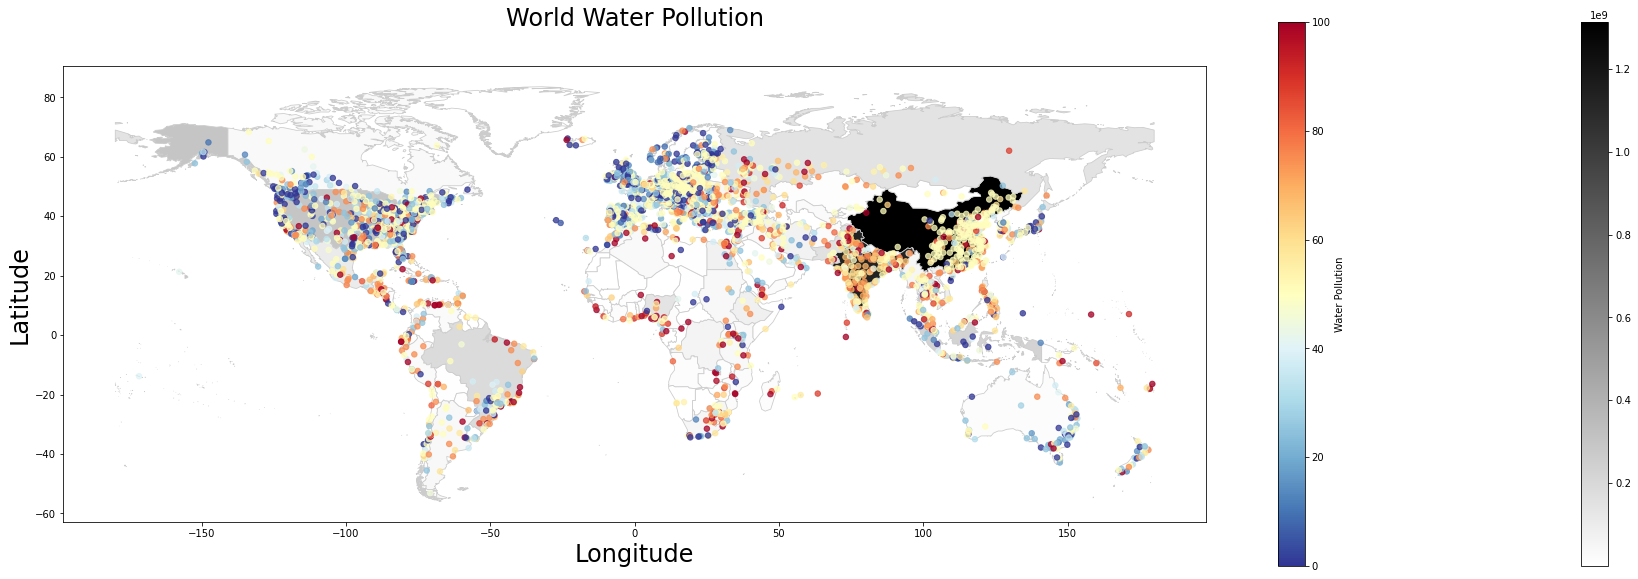

In [11]:
import matplotlib
from matplotlib import cm

fig, ax = plt.subplots(1, figsize=(32, 10))

population = map_data[map_data["POP2005"]>0]
# Visualization layer that creates a base map
population.plot(column = 'POP2005', cmap='gray_r', label='Population', linewidth=0.8, ax=ax, edgecolor='0.8', legend = True)

my_cmap2 = cm.RdYlBu_r

norm = matplotlib.colors.Normalize(vmin=0, vmax=100)
r = cm.ScalarMappable(cmap=my_cmap2, norm=norm)
r.set_array([])
plt.colorbar(r, label='Water Pollution')

# Visualization layer that creates geospatial view of pollution data
plt.scatter(latitude, longitude, c=waterquality, cmap=my_cmap2, s=30, alpha=0.75)

plt.xlabel("Longitude", fontsize=24)
plt.ylabel("Latitude", fontsize=24)
plt.title("World Water Pollution", pad=40, fontsize=24)

plt.show()

In [12]:
merged_data = pd.merge(map_data, carbon, how = 'left', on = 'NAME')
merged_data.fillna(0, inplace = True)
merged_data.head()

,FIPS,ISO2,ISO3,UN,NAME,AREA,POP2005,REGION,SUBREGION,LON,...,geometry,Year,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total)
0,AC,AG,ATG,28,Antigua and Barbuda,44,83039,19,29,-61.783,...,"MULTIPOLYGON (((-61.68667 17.02444, -61.88722 ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
1,AG,DZ,DZA,12,Algeria,238174,32854159,2,15,2.632,...,"POLYGON ((2.96361 36.80222, 4.78583 36.89472, ...",2014.0,39651.0,149.0,14422.0,20151.0,2856.0,2073.0,1.02,581.0
2,AJ,AZ,AZE,31,Azerbaijan,8260,8352021,142,145,47.395,...,"MULTIPOLYGON (((45.08332 39.76805, 45.81999 39...",2014.0,10223.0,2.0,3174.0,5782.0,390.0,876.0,1.06,360.0
3,AL,AL,ALB,8,Albania,2740,3153731,150,39,20.068,...,"POLYGON ((19.43621 41.02107, 19.60056 41.79666...",2014.0,1559.0,191.0,1053.0,16.0,299.0,0.0,0.54,23.0
4,AM,AM,ARM,51,Armenia,2820,3017661,142,145,44.563,...,"POLYGON ((45.15387 41.19860, 46.00194 40.22555...",2014.0,1508.0,0.0,234.0,1216.0,58.0,0.0,0.50,34.0


In [13]:
print(len(merged_data))

247


/Users/ribells/opt/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:1327: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)


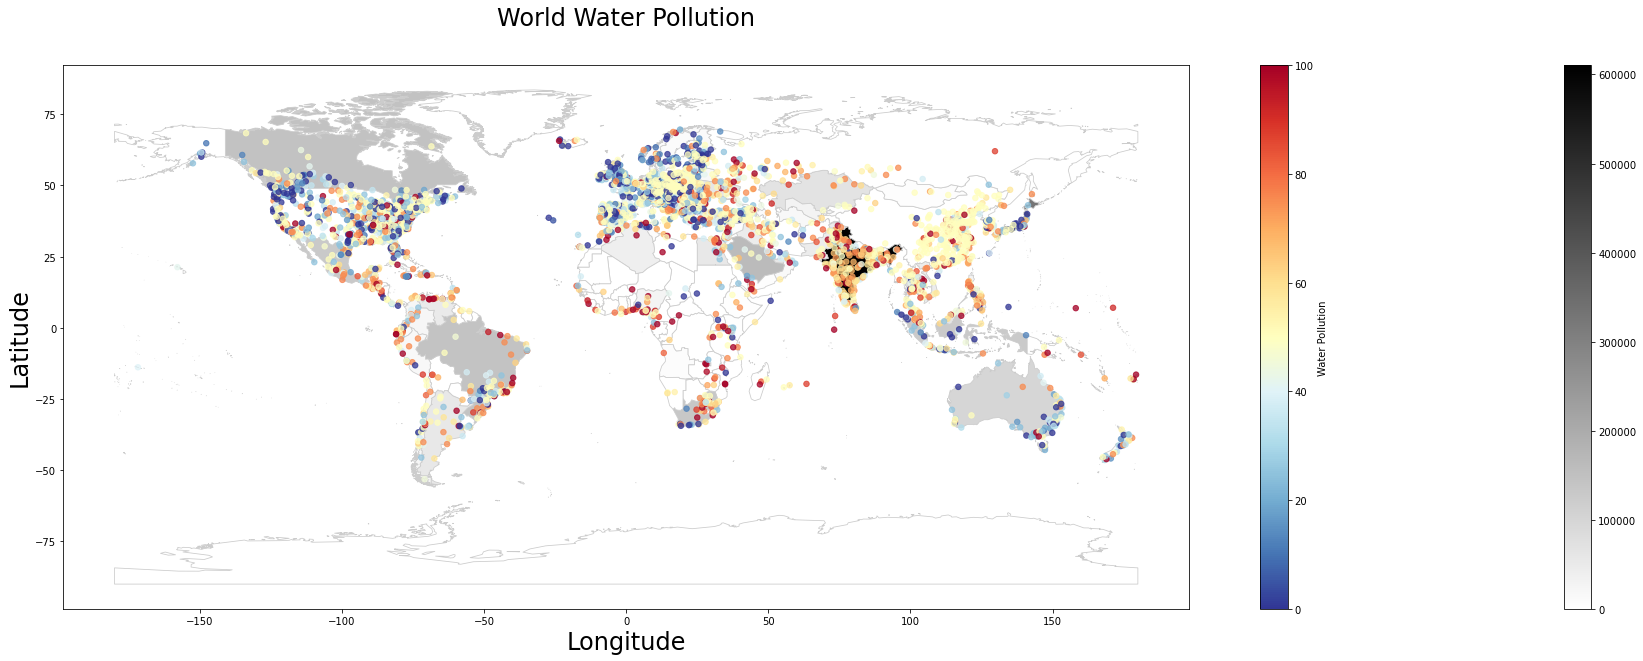

In [17]:
import matplotlib
from matplotlib import cm

fig, ax = plt.subplots(1, figsize=(32, 10))

Total = map_data[merged_data["Total"]>0]
# Visualization layer that creates a base map
merged_data.plot(column = 'Total', cmap='gray_r', label='Total Fuel', linewidth=0.8, ax=ax, edgecolor='0.8', legend = True)

my_cmap2 = cm.RdYlBu_r

norm = matplotlib.colors.Normalize(vmin=0, vmax=100)
r = cm.ScalarMappable(cmap=my_cmap2, norm=norm)
r.set_array([])
plt.colorbar(r, label='Water Pollution')

# Visualization layer that creates geospatial view of pollution data
plt.scatter(latitude, longitude, c=waterquality, cmap=my_cmap2, s=30, alpha=0.75)

plt.xlabel("Longitude", fontsize=24)
plt.ylabel("Latitude", fontsize=24)
plt.title("World Water Pollution", pad=40, fontsize=24)

plt.show()

In [5]:
# pip install simplejson
import numpy as np
import matplotlib.pyplot as plt
import dateutil.parser
import datetime
from urllib.request import urlopen, Request
import simplejson as json

In [52]:
#pip install ecmwf-api-client

longitude = 24.+36./60
latitude = 59+24./60
apikey = '63a176a34fe1c38298db122400ef4d57'
#apikey = open('APIKEY').readlines()[0].strip() #'<YOUR API KEY HERE>'

API_url = "http://api.planetos.com/v1/datasets/noaa_gfs_global_sflux_0.12d/point?lon={0}&lat={1}&count=5&verbose=true&apikey={2}".format(longitude,latitude,apikey)
request = Request(API_url)
response = urlopen(request)
API_data = json.loads(response.read())

HTTPError: HTTP Error 403: Forbidden

In [ ]:
#example of average wind speed from http://windatlas.xyz/ API services 
import requests

response = requests.get('http://windatlas.xyz/api/wind/?lat=-46.4178708&lon=168.3614659&height=100&date_from=2019-01-01&date_to=2019-01-31')
if response:
  print(response.text[response.text.find("': '")+4:response.text.find("(")-1])
else:
  print('Request returned an error.')

In [ ]:
#get the average wind magnitude with latitude and longitude from pollution CSV
import requests

for i in range(5):
    lat = poll["Latitude"][i]
    lon = poll["Longitude"][i]
    responseURL = 'http://windatlas.xyz/api/wind/?lat=' + str(lat) + '&lon=' + str(lon) + '&height=100&date_from=2019-01-01&date_to=2019-01-31'

    response = requests.get(responseURL)
    if response:
        print(response.text[response.text.find("': '")+4:response.text.find("(")-1])
    else:
        print('Request returned an error.')

    #print(responseURL)

In [ ]:
#get wind weather data from openweathermap.org
import requests

apikey = '024ef55404d3b704855aa94e2fc032fe'
wind = ""
wind_data = []
winddir_data = []

for i in range(1985,len(poll["Latitude"])):
    lat = poll["Latitude"][i]
    lon = poll["Longitude"][i]

    responseURL = 'http://api.openweathermap.org/data/2.5/weather?lat=' + str(lat) + '&lon=' + str(lon) + '&appid=' + apikey

    response = requests.get(responseURL)
    if response:
        wind = response.text[response.text.find('"wind":{')+8:response.text.find('},"clouds"')]
        #print(response.text[response.text.find('"wind":{')+8:response.text.find('},"clouds"')])
        wind = wind[8:wind.find(',')]
        wind_data.append(wind)
        wind_direction = response.text[response.text.find('"wind":{')+8:response.text.find('},"clouds"')]
        wind_direction = wind_direction.split(',')
        wind_direction = wind_direction[1][wind_direction[1].find('"deg":')+6:]
        winddir_data.append(wind_direction)
    else:
        print('Request returned an error.')

    #print(responseURL)
    
    if i%100==0: #print progress every 100th city data received
        print(i)

print(wind_data, winddir_data)